# 3. Supervised learning algorithm (지도 학습 알고리즘)

## 3-1. 예제에 사용할 데이터셋

X.shape: (26, 2)


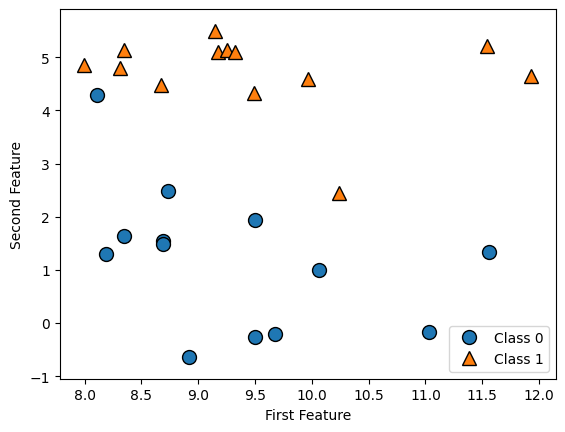

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# 두 개의 특성을 가진 인위적으로 만든 이진 분류 데이터셋인 forge 데이터셋을 생성
X, y = mglearn.datasets.make_forge()
# 산점도를 생성
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape:", X.shape);

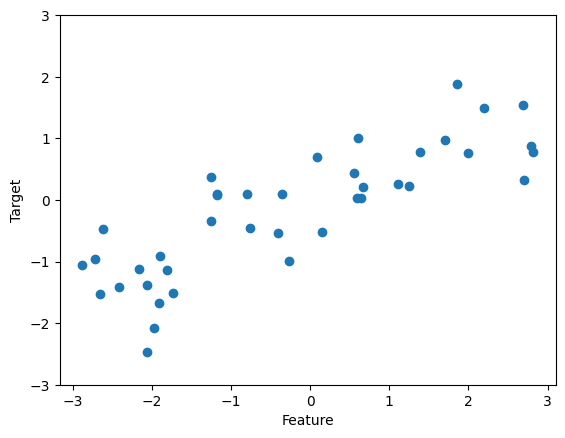

In [2]:
# 희귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋을 사용
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target");

In [3]:
# scikit-learn에 있는 load_breast_cancer 함수를 사용하여 불러올 수 있음
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key():\n", cancer.keys())

cancer.key():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
# 이 데이터셋은 569개의 데이터 포인트를 가지고 있고 특성은 30개
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [5]:
# 569개 데이터 포인트 중 212개는 악성이고 357개는 양성
print("클래스별 샘플 개수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [6]:
# feature_names 속성을 확인
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [8]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


## 3-2. k-최근접 이웃
- k-최근접(k-Nearest Neighbors) 알고리즘은 가장 간단한 머신러닝 알고리즘
- 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부
- 새로운 데이터 포인트에 대해 예측할 때는 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾음

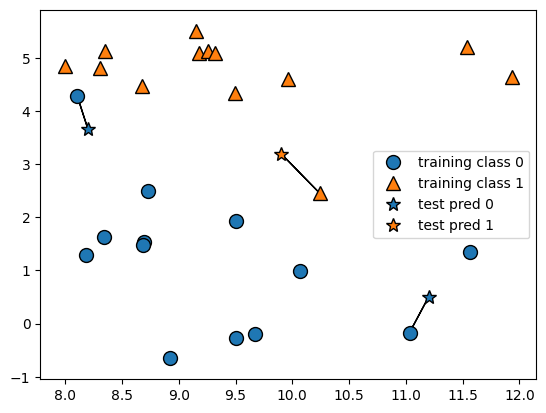

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

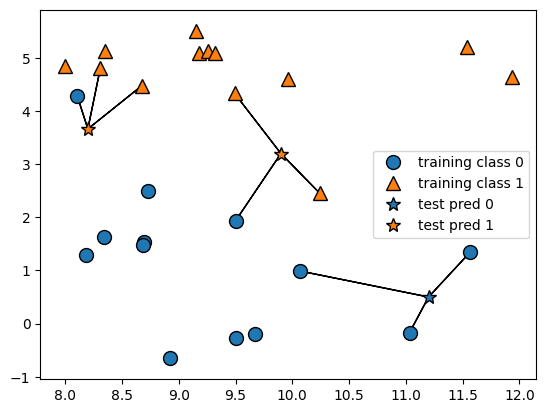

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)